In [1]:
from kagglegym import make
import kagglegym
import numpy as np
import pandas as pd
import random
import xgboost as xgb
from sklearn import ensemble, linear_model, metrics
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.preprocessing import Imputer, normalize
import time
import operator
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# initialize kaggle gym environment
env = make()
o = env.reset()

### Formatting and feature engineering

In [3]:
X = o.train.drop('y',1).copy()
y = o.train['y'].copy()

In [4]:
print X.shape
print y.shape

(806298, 110)
(806298,)


In [5]:
# number of nulls in a row
X["nbnulls"]=X.isnull().sum(axis=1)

In [7]:
print X.shape
print y.shape
X.columns

(806298, 111)
(806298,)


Index([           u'id',     u'timestamp',     u'derived_0',     u'derived_1',
           u'derived_2',     u'derived_3',     u'derived_4', u'fundamental_0',
       u'fundamental_1', u'fundamental_2',
       ...
        u'technical_36',  u'technical_37',  u'technical_38',  u'technical_39',
        u'technical_40',  u'technical_41',  u'technical_42',  u'technical_43',
        u'technical_44',       u'nbnulls'],
      dtype='object', length=111)

In [8]:
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

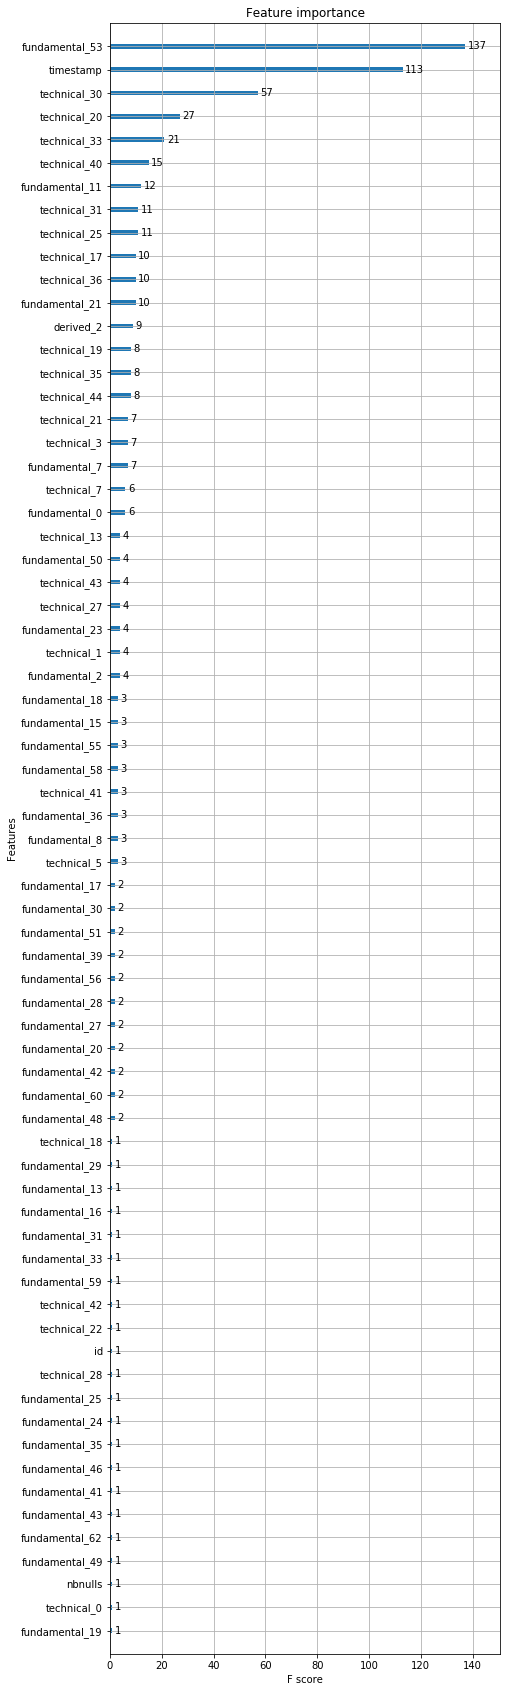

In [9]:
fig, ax = plt.subplots(figsize=(7, 30))
xgb.plot_importance(model, ax=ax)